# Introduction to Plotting with matplotlib

Graphical representations of functions and data are enormously important for gaining insight into the behavior of physical systems. Whether the numbers in our `numpy` arrays are the result of a simulation, an experiment, or a calculation, we need to do more with this information than inspect the values of their elements. We need to be able to visualize them. We can produce publication-quality plots from `numpy` arrays with [`matplotlib`](https://matplotlib.org/).


### Example: A Particle Trajectory 

Recall our particle trajectory from Week4's lecture, which we represented as a 2D `numpy` array. 
$$
\mathbf{r}(t) = \begin{pmatrix}
                x(t)\\
                y(t)\\
                z(t)
                \end{pmatrix} =  
                \begin{pmatrix}
                \cos{t}\\
                \frac{t}{5} + \sin{\frac{t}{2}}\\
                2t + 2\sin{t}
                \end{pmatrix}~{\rm m}, 
                $$
Defined over the interval of time $t\in[0,4\pi]~{\rm s}$. 

In [2]:
import numpy as np
def create_position(nframes=1000000):
    """Generate an array holding the  x, y, and z position of a particle as a function of time.
    
    Parameters
    ----------
    nframes: int
        number of frames; more frames increases the time sampling (i.e. the resolution) 
        of the trajectory, but not the amount of time over which it occurs. 
        
    Returns
    -------
    time : np.ndarray, shape=(nframes,)
        An array holding the times at which the position was sampled in s
    position : np.ndarray, shape=(nframes, 3)
        An array containing the (x, y, z) position of the particle as a function of time in m. 
        
    """
    # generate x, y, z positions
    time = np.linspace(0, 4.0*np.pi, nframes)
    x = np.cos(time)
    y = time/5 + np.sin(time/2.0)
    z = 2*time + 2* np.sin(time)

    # put them all in a single array; this yields an array with shape =(3, nframes)
    position = np.array([x, y, z])

    # Return the time and the position. Transposing the position arrays returns an array with shape = (nframes, 3). 
    # This *feels* more natural for a trajectory, since each row is a point in time and each column is a spatial dimension
    return time, position.transpose()

So time is stored in a 1D array of `shape=(nframes,)`, and the the positions are stored in a two dimensional array, with the first axis, `axis=0`, or the rows, corresponding to the time dimension, and the second axis, `axis=1`, or the columns, corresponding to the spatial dimension. The shape of the array is `(nframes,3)`, where `nframes` is the number of time snapshots. In other words, the array looks like this:
$$
\begin{pmatrix}
x(t_0) & y(t_0) & z(t_0)\\
x(t_1) & y(t_1) & z(t_1)\\
\vdots & \vdots & \vdots\\
x(t_{\rm nframes-1}) & y(t_{\rm nframes-1}) & z(t_{\rm nframes-1})
\end{pmatrix}
$$

## Plotting with matplotlib

In [3]:
# Import the pyplot interface aliased to plt (this is the widely used convention)
import matplotlib.pyplot as plt

Generate some data to play with

In [4]:
time, position = create_position()

The *matplotlib* packages contains two different but closely related [plotting interfaces](https://matplotlib.org/stable/tutorials/introductory/usage.html#the-object-oriented-interface-and-the-pyplot-interface)
- simple "state-based" plotting on a canvas (`pyplot`)
- the object-oriented API

### Basic plots: Plotting on a canvas (`pyplot`)

Let's plot the $x(t)$ position of our particle trajectory:

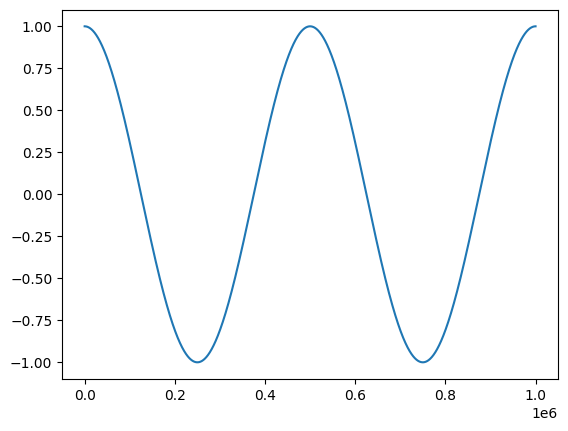

In [5]:
plt.plot(position[:, 0])

Note that we only passed one `numpy` array to the `plt.plot()` function and so it automatically chooses the $x$-axis of our plot to be the index of the array, and the $y$-axis to be the values of the array `position[:,0]`, i.e. 

In [6]:
position[:,0].shape

(1000000,)

So this is a plot of $x(t)$ vs the frame number or array index. More useful would be to plot $x(t)$ vs $t$. We can do this by passing two arrays to `plt.plot()`. 

Text(0, 0.5, 'x(t) (m)')

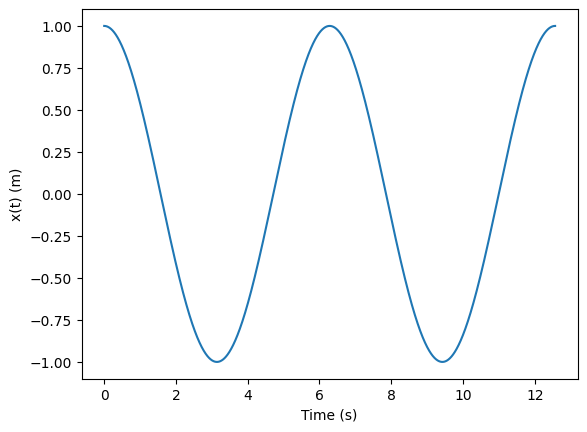

In [7]:
plt.plot(time, position[:, 0])
plt.xlabel('Time (s)')
plt.ylabel('x(t) (m)')

Note the extra syntax that we added to label the coordinate axes. 

### Multiple curves on the same plot

It might be more informative to show $x(t)$, $y(t)$, and $z(t)$ on the same plot. We can do this by calling `plt.plot()` three times, once for each coordinate. 

In [8]:
# tuple unpacking
x,y,z = position.T 
print(x.shape,y.shape,z.shape)

(1000000,) (1000000,) (1000000,)


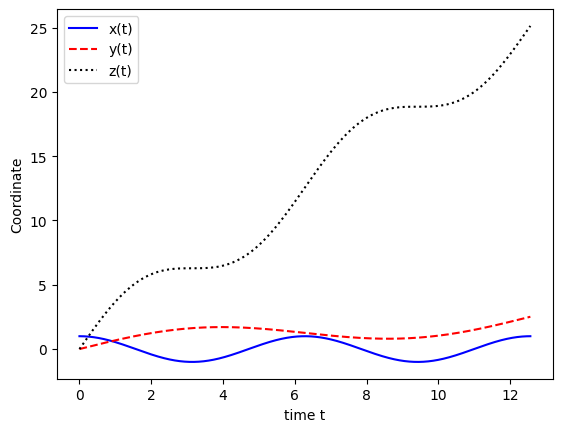

In [9]:
plt.plot(time,x, linestyle="-", color='blue', label="x(t)")
plt.plot(time,y, linestyle="--", color='red', label="y(t)")
plt.plot(time,z, linestyle=":", color='black', label="z(t)")
plt.xlabel("time t")
plt.ylabel("Coordinate")
plt.legend()

Notice how I specified the colors and linestyles for the plot, and how the curves were labeled with a legend:
- `linestyle` for different [matplotlib line styles](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html)
- [`legend()`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html?highlight=legend#matplotlib.pyplot.legend) to add a legend with the `labels`

`matplotlib` also did a pretty good job of automatically choosing the limits of the $x$- and $y$-axis, but these can be adjusted manually. Indeed, there are many, many options for customizing the appearance of the plot.

### Saving figures

`matplotlib` can export plots to many different file formats such as *png*, *jpg*, *eps*, *svg*, and *pdf*.  Just use `plt.savefig(FILENAME.ext)` after plotting with the appropriate extension and it will save the plot to your current working directory.

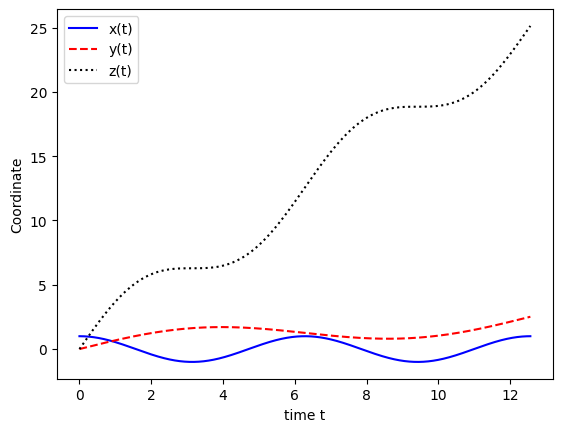

In [10]:
plt.plot(time,x, linestyle="-", color='blue', label="x(t)")
plt.plot(time,y, linestyle="--", color='red', label="y(t)")
plt.plot(time,z, linestyle=":", color='black', label="z(t)")
plt.xlabel("time t")
plt.ylabel("Coordinate")
plt.legend()
plt.savefig("trajectory_plot.png")

In [11]:
%ls *.png

trajectory_plot.png


### Multipanel plots: Using the object-oriented API

The plot above is nice for visualizing all the positions at once, but we might want to be zoom in more on the $x(t)$ and $y(t)$ positions while still showing the full range of the $z(t)$ position. For this
three plots side by side might be more useful.  Let's make a three-panel plot with $x(t)$, $y(t)$ and $z(t)$ as a function of time on separate plots. 

For this we use the object-oriented API that provides fine-grained control over [all parts of a figure](https://matplotlib.org/stable/tutorials/introductory/usage.html#parts-of-a-figure):
   1. generate a `Figure` object instance and an array of `Axes` instances
   2. Using a for loop, plot the `Axes` instances and annotate accordingly


Text(0.5, 0.98, 'Particle trajectory')

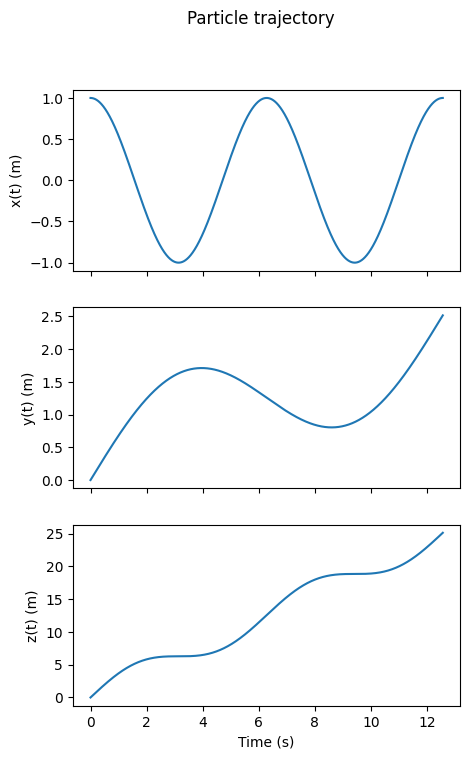

In [12]:
# 1) Generate a figure object, and an array of axes objects
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(5,8))
# nrows=3, ncols=1 means that we want a 3x1 grid of subplots
# sharex=True means that all subplots should share the same common x-axis
# figsize indicates the size in units of inches

# A list of axes labels
coord_str = ['x(t)', 'y(t)', 'z(t)']

# 2) Loop over the subplots and plot the x, y, z coordinates, and set the y-labels
for ii in range(3):
    axes[ii].plot(time, position[:, ii]) 
    axes[ii].set_ylabel(coord_str[ii] + ' (m)') 

# Label the time axis
axes[2].set_xlabel('Time (s)')
# Create a title for the entire plot
fig.suptitle('Particle trajectory')


This plot is close to what we want, but aesthetically it could be improved. We can have the GitHub CoPilot AI (or chatGPT AI) help us with that:

> "Provide code to regenerate this plot for me, but remove the whitespace between the x-axes, align the y-axis labels, and make the suptitle closer to the top of the top plot"

### Plotting in 3D
Matplotlib has [basic 3D plotting capabilities](http://matplotlib.org/1.3.1/mpl_toolkits/mplot3d/tutorial.html)

(You can also try `%matplotlib widget` (or `%matplotlib ipympl`) and if you are lucky, you will be able to get an interactive 3D graphic. However, that does not always seem to work or you have to make sure that it is the first and only `%matplotlib` command that you use.)

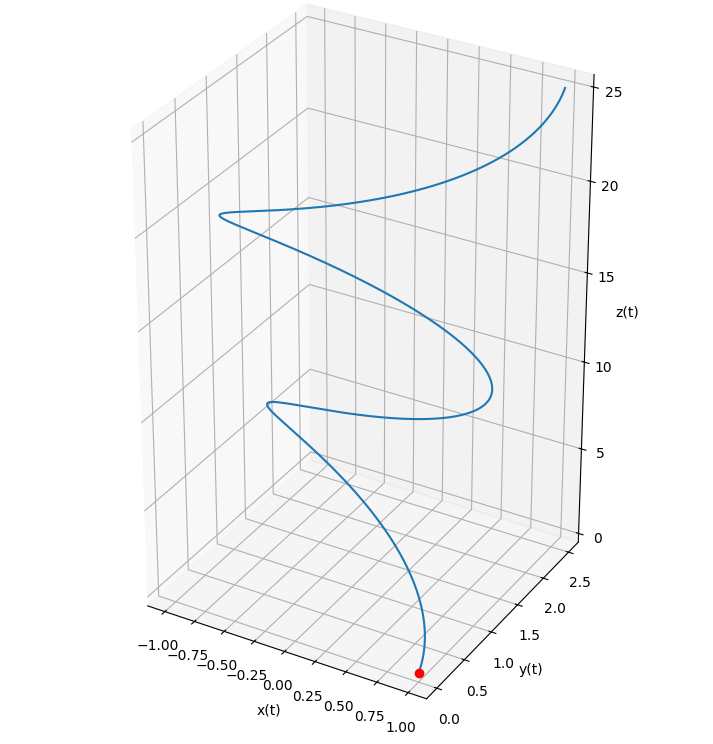

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure object with the object-oriented interface
fig = plt.figure(figsize=(9,9))
# Add a 3D axis to the figure, 1 row, 1 column, 1st subplot
ax = fig.add_subplot(1,1,1, projection='3d')
# Plot the positions in 3D space
ax.plot(x, y, z)
# Plot the reference position, which is the start of the trajectory as a red dot
ax.plot(x[0:1], y[0:1], z[0:1], 'ro')
# Label the axes
ax.set_xlabel(r"x(t)")
ax.set_ylabel(r"y(t)")
ax.set_zlabel(r"z(t)")

# Adjust the aspect ratio of the plot box for a 3D plot
ax.set_box_aspect([0.9, 0.9, 1.5])




## Scatter Plots

Now let us imagine that we have an instrument that can measure the position of the particle in 3D space, but 1) we can only measure the position at discrete times $t_{\rm samp}$ which are every 10,000 frames, 2) our measurements are noisy with the noise following a **Gaussian distribution** (also known as a normal distribution). Furthermore the level of noise in our measurement appartus for each position  is known to us, but it is also stochastic, i.e. the level of the noise varies from measurement to measurement, and the noise itself is Gaussian distributed. 

Mathetically we can write

$$ \mathbf{\hat r}(t_{\rm samp}) = \mathbf{r(t_{\rm samp})} + \boldsymbol{\epsilon(t_{\rm samp})}$$

where $\mathbf{r}_{\rm noisy}$ is the noisy measurement, $\mathbf{r}$ is the true position, and $\boldsymbol{\epsilon}$ is the noise.

Furthermore, we write the noise as 
$$
\boldsymbol{\epsilon}(t_{\rm samp}) = \begin{pmatrix}
                \epsilon_x(t_{\rm samp})\\
                \epsilon_y(t_{\rm samp})\\
                \epsilon_z(t_{\rm samp})
                \end{pmatrix} 
$$
where  $\epsilon_i$ is the noise in the $i{\rm th}$ coordinate. It is a random variable drawn from a Gaussian distribution 
$$
\epsilon_i(t_{\rm samp}) \sim \mathcal{N}(\mu,\sigma_i)
$$
where $\mathcal{N}(\mu,\sigma)$ is the Gaussian distribution: 
$$
\mathcal{N}(\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right), 
$$
the mean $\mu$ is zero, and $\sigma_i$ is the standard deviation of the noise in the $i{\rm th}$ coordinate which 
is itself a random variable drawn from a uniform distribution
$$ 
\sigma_i \sim \mathcal{U}(0.0,1.0)~{\rm m}, 
$$
where $\mathcal{U}(a,b)$ is the uniform distribution between $a$ and $b$, i.e. 
$$
\mathcal{U}(a,b) = \frac{1}{b-a}~{\rm for}~a\leq x\leq b,~{\rm and}~0~{\rm otherwise}.
$$

 Note that we have assumed that the noise in each direction is independent of the noise in the other directions, and that the standard deviations are also not correlated in direction or in time. 


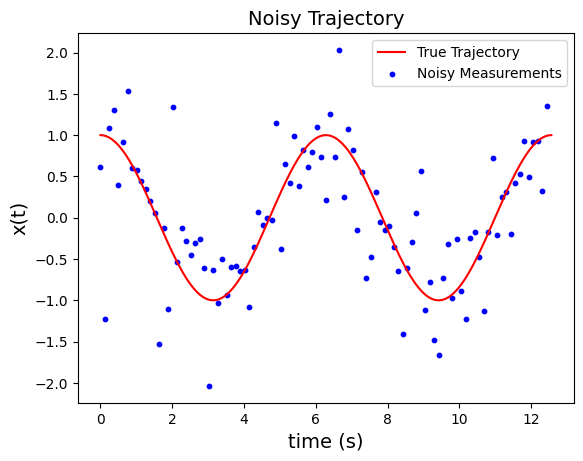

In [14]:
ndown= 10000
# Downsample the trajectory to every 10000th frame
downsampled_time = time[::ndown]
downsampled_position = position[::ndown]

# Initialize the pseudo-random number generator
seed = 42
rng = np.random.default_rng(42)
# The standard deviation of the noise is drawn from a uniform distribution. This generates
# an array of  random uniformly distributed standard deviation value between 0.01 and 1.0 of the same 
# shape as the downsampled position
noise_sigma = rng.uniform(0.0, 1.0, size=downsampled_position.shape)

# Generate unit variance Gaussian noise with the same shape
unit_variance_noise = np.random.normal(0, 1.0, size=downsampled_position.shape)

# The product of the (nsample, 3) standard deviation array and (nsample, 3) unit variance noise array
# generates a (nsample, 3) array of Gaussian noise with the desired standard deviations which 
# we add to the data
noise = noise_sigma * unit_variance_noise
noisy_position = downsampled_position + noise

# Plot x vs time
plt.plot(time, x, color='red', label='True Trajectory') # This is true position at all time snapshots
plt.scatter(downsampled_time, noisy_position[:, 0], color='blue', s=10, label='Noisy Measurements')
plt.xlabel('time (s)', fontsize=14)
plt.ylabel('x(t)', fontsize=14)
plt.title('Noisy Trajectory', fontsize=14)
plt.legend()
plt.show()


While this plot is very informative, it unfortunately does not convey the level of the noise in our measurements. Above we stated that our measurement apparatus tells us the noise, and we want to know
that for example some points with low noise are more trustworthy than points with high noise. We can visualize this by not only plotting a scatter plot of the measurements, but also adding the noise level 
as error bars. 

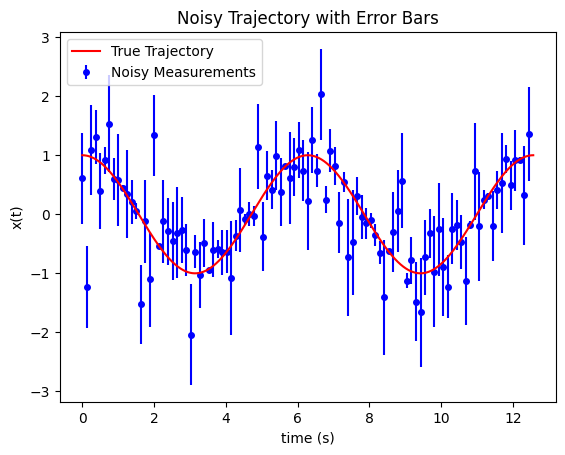

In [15]:
# Plot the noisy position as circular markers fmt='o', with error bars
plt.errorbar(downsampled_time, noisy_position[:,0], yerr=noise_sigma[:, 0], fmt='o', markersize=4, color='blue', label='Noisy Measurements')
plt.plot(time, x, color='red', label='True Trajectory', zorder=10) # This is true position at all time snapshots
plt.xlabel('time (s)')
plt.ylabel('x(t)')
plt.title('Noisy Trajectory with Error Bars')
plt.legend(loc='upper left')
plt.show()


Notice that from the plot above, we can see that the noise level is different for each measurement, and furthermore the low-noise measurements (small error bars) lie right on the 'True Trajectory' curve, whereas the measurements with large noise (large error bars) deviate from the true trajectory at a level that is consistent with the error bars. 

## Plotting Histograms

The example above involved two random processes, one for the noise level $\mathcal{U}(a,b)$ and another for the noise distribution, $\mathcal{N}(\mu,\sigma_i)$. We simulated these by drawing pseudo-random numbers from the respective distributions. We will discuss the concepts behind probability distributions, and random numbers in upcoming lectures. But they provide a nice context to discuss another useful form of visualization, which are histograms.

For example, suppose we want to examine the distribution of the noise standard deviations, $\sigma_i$, in the all of the coordinates, irrespective of coordinate

(100, 3)
(300,)


Text(0, 0.5, 'Number')

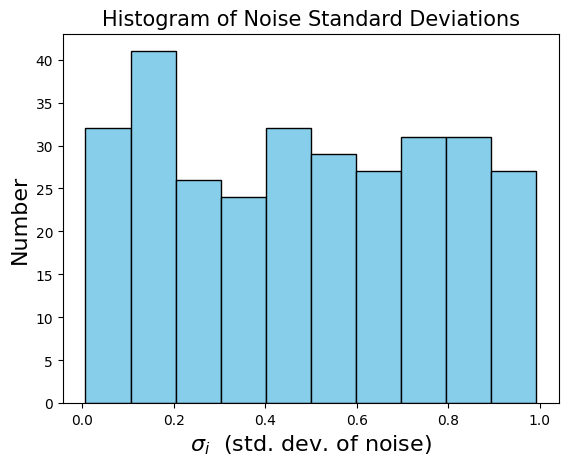

In [16]:
print(noise_sigma.shape)
print(noise_sigma.flatten().shape)
counts, bin_edges, patches = plt.hist(noise_sigma.flatten(), bins=10, edgecolor='black', color='skyblue')
plt.title('Histogram of Noise Standard Deviations', fontsize=15)
plt.xlabel(r'$\sigma_i$' +  '  (std. dev. of noise)', fontsize=16)
plt.ylabel('Number', fontsize=16)

In the example above, I used the built in `matplotlib` histogram function `plt.hist()` to plot the histogram of the noise standard deviations. There is also a way to make a histogram in `numpy` using the `np.histogram()` function, and then plot the result with `matplotlib`. For example:

Text(0, 0.5, 'Number')

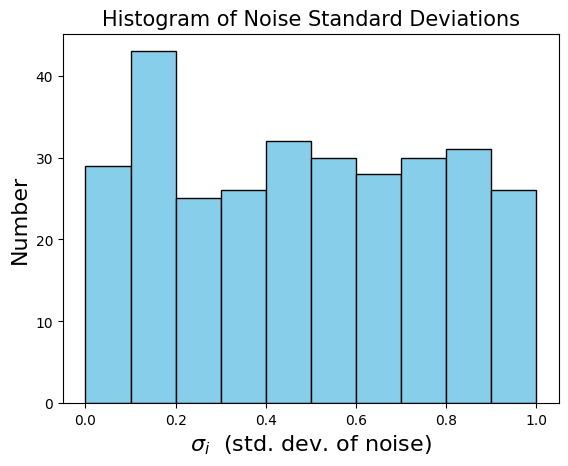

In [17]:
# numpy histogram example
bins = np.linspace(0, 1, 11) # produce 11 bin edges from 0 to 1, which implies 10 bins
counts, bin_edges = np.histogram(noise_sigma.flatten(), bins=bins)
lower_edge = bin_edges[:-1]
upper_edge = bin_edges[1:]
bin_centers = (lower_edge + upper_edge)/ 2
bin_widths = np.diff(bin_edges)
# Use the plt.bar function to plot the histogram as a bar chart
plt.bar(bin_centers, counts, width=bin_widths, edgecolor='black', color='skyblue')
plt.xlabel('Standard Deviation of Noise')
plt.ylabel('Frequency')
plt.title('Histogram of Noise Standard Deviations', fontsize=15)
plt.xlabel(r'$\sigma_i$' +  '  (std. dev. of noise)', fontsize=16)
plt.ylabel('Number', fontsize=16)


Now we can better understand how the histogram works by plotting the the left and right bin edges, and the number of values in each bin.

In [18]:
print(bin_edges.shape)
print(counts.shape)
print(noise_sigma.flatten().shape)
print(np.sum(counts))

(11,)
(10,)
(300,)
300


In [19]:
for i in range(len(counts)):
    count = counts[i]
    print(f"Bin Range: ({lower_edge[i]:.2f} - {upper_edge[i]:.2f}), Count: {counts[i]}")


Bin Range: (0.00 - 0.10), Count: 29
Bin Range: (0.10 - 0.20), Count: 43
Bin Range: (0.20 - 0.30), Count: 25
Bin Range: (0.30 - 0.40), Count: 26
Bin Range: (0.40 - 0.50), Count: 32
Bin Range: (0.50 - 0.60), Count: 30
Bin Range: (0.60 - 0.70), Count: 28
Bin Range: (0.70 - 0.80), Count: 30
Bin Range: (0.80 - 0.90), Count: 31
Bin Range: (0.90 - 1.00), Count: 26


## Log-Log and Semi-Log Plots 

Situations often arise in physics where it is more useful to visualize data or equations using a **logarithmic scale**. This occurs in situations where either the independent or dependent variable, or both, span many orders of magnitude. 

In seismology, the [Gutenberg–Richter law](https://en.wikipedia.org/wiki/Gutenberg–Richter_law#References) expresses the relationship between the magnitude of an Earthquake and the total number of earthquakes in any given region over some period of time of at least that magnitude. It is given by the equation
$$
N(> M)= N_{\rm tot}10^{-bM}
$$
where $N( > M)$ is the number of earthquakes that are larger than a given magnitude, $M$, on the so-called Richter scale,  and $b$ and $N_{\rm tot}$ are constants, the latter being a normalization constant.

Note however, that the magnitude, $M$, on the Richter scale, is itself a logarithmic quantity, i.e. 
$$
M = \log_{10}\left(\frac{A}{A_0}\right)
$$
where $A$ is the amplitude of a seismic wave measured by a seismograph at a standard distance from the earthquake epicenter, and $A_0$ is a constant reference amplitude. 

So actually, if we were to express the Gutenberg–Richter law in terms of the seismic wave amplitude, $A$, we see that it obeys
$$
N( > A) =  N_{\rm tot}\left(\frac{A}{A_0}\right)^{-b}
$$
where $N( > A)$ is the number of earthquakes that are larger than a given amplitude, $A$. This is a **power law** distribution of the Earthquake wave amplitudes. 

Many quantities in nature exhibit power-law behavior. For example, the frequency  of the different words in a book, the number of citations received by different scientists, the sizes of lunar craters, the number of books sold for different books, the population of cities in a country, and the amplitudes of earthquakes are all examples of things described by power-law distributions. 

The reason for this is that some physical processes are scale-invariant, like for example Newton's law of gravity. 
$$ 
F_{\rm grav} = \frac{Gm_1m_2}{r^2}. 
$$
There is no characteristic length scale in Newton's law of gravity, and so the force between two masses has a power-law behavior of $r^{-2}$ no matter the distance.  Physical processes that are scale-invariant are often referred to as being **fractal** in nature, which is to say that they have a **self-similar structure**: if you zoom in our or zoom out from your view of the process, it looks the same. Power law distributions provide a good description of situations where an extreme event (a large earthquake, a large city, a best-selling book) is much rarer than a less extreme event, but can still occur with a non-negligible probability (i.e. there is no cutoff scale in the physical process).  And as you discovered on the Week4 homework, it is this tendency for things in nature to follow power-law distributions which underlies *Benford's law*.

Let's try to plot $N( > A)$ vs $A$ for the state of California, for earthquakes that range in magnitude from $M=0.0$ to $M=10.0$. For reference, a microquake is barely detectable and has a magnitude of $M\lt 2$, whereas the strongest earthquake ever recorded was $M=9.5$ in Chile in 1960.

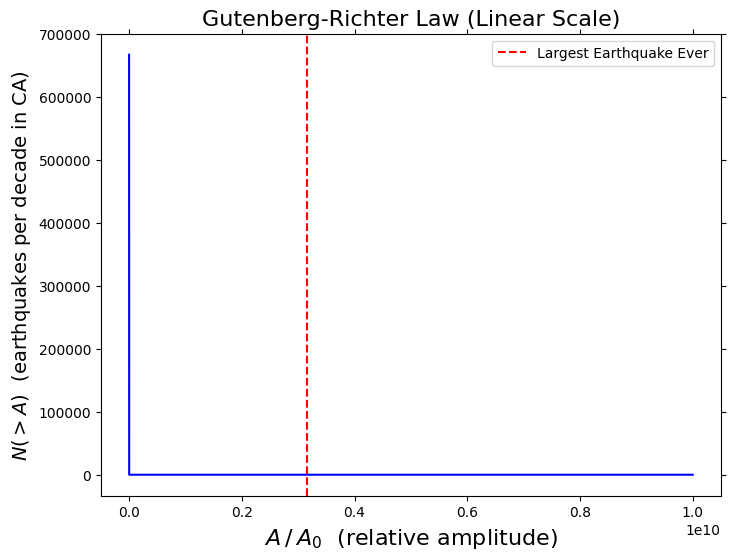

In [47]:
import matplotlib.pyplot as plt

def gutenberg_richter_law(M, b, N_tot):
    """Compute the number of earthquakes of a given magnitude or larger using the Gutenberg-Richter law.

    Parameters
    ----------
    M : np.ndarray
        Magnitude of earthquakes
    b : float   
        Gutenberg-Richter b-value
    N_tot : float
        Total number of earthquakes used to normalize the distribution. 
    """
    return N_tot * np.power(10, -b * M)

# Parameters for the Gutenberg-Richter law
b = 1.0
N_tot = 1e6/15.0*10.0 
# I read these numbers off a plot on CA earthquake frequency

# Generate a range of magnitudes from 0.0 to 10.0
M = np.linspace(0.0, 10.0, 1000)

# Compute the number of earthquakes using the Gutenberg-Richter law
N = gutenberg_richter_law(M, b, N_tot)

# Convert M to A
A_over_A0 = np.power(10.0, M)

# Create a new figure and a set of axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot on the axes
ax.plot(A_over_A0, N, color='blue')
ax.axvline(np.power(10.0, 9.5), color='red', linestyle='--', label='Largest Earthquake Ever')

# Set labels and title
ax.set_xlabel(r'$A\slash A_0$' + '  (relative amplitude)', fontsize=16)
ax.set_ylabel(r'$N(> A)$' +  '  (earthquakes per decade in CA)', fontsize=14)
ax.set_title('Gutenberg-Richter Law (Linear Scale)', fontsize=16)

# Add tick marks on the upper x-axis and the rightmost y-axis
ax.tick_params(which='both', top=True, right=True)

# Show the legend 
ax.legend()

This plot is well, pretty useless. For example, how likely we are to experience an earthquake as large as the $M=9.5$ one in Chile in 1960 in the next decade. The number of such earthquakes expected $N( > A_{\rm Chile})$ is clearly very small, but how small?

This challenges arises, because, as you can see below, the dynamic range spanned by both the $x$ and $y$ axes is very large, i.e. 10 orders of magnitude:  

In [42]:
print(f"A_min: {A_over_A0.min():.2e}, A_max: {A_over_A0.max():.2e}")
print(f"N_min: {N.min():.2e}, N_max: {N.max():.2e}")


A_min: 1.00e+00, A_max: 1.00e+10
N_min: 6.67e-05, N_max: 6.67e+05


In this situation adopting a logarithmic scale for the $x$ and $y$ axes is far more useful. We can recreate the plot as follows:

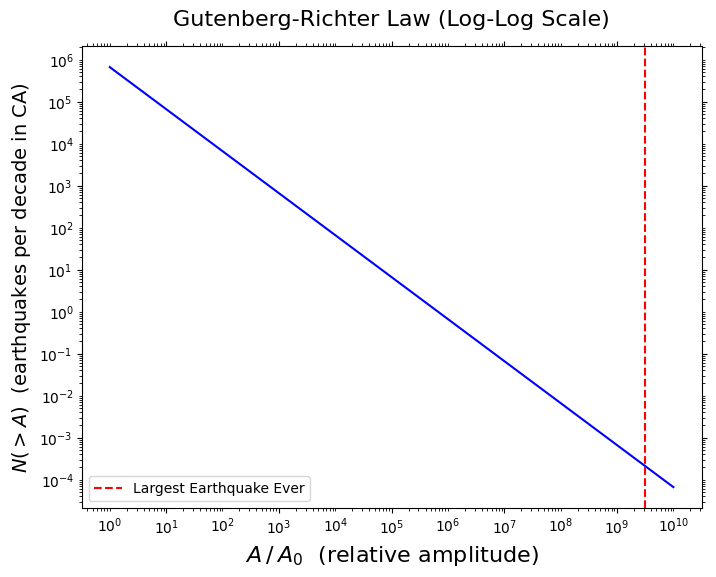

In [46]:
import matplotlib.ticker as ticker

# Create a new figure and a set of axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot on the axes
ax.plot(A_over_A0, N, color='blue')
ax.axvline(np.power(10.0, 9.5), color='red', linestyle='--', label='Largest Earthquake Ever')

# Set the scale to make this a log-log plot
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel(r'$A\slash A_0$' + '  (relative amplitude)', fontsize=16)
ax.set_ylabel(r'$N(> A)$' +  '  (earthquakes per decade in CA)', fontsize=14)
ax.set_title('Gutenberg-Richter Law (Log-Log Scale)', fontsize=16, pad=15)

# Add tick marks on the upper x-axis and the rightmost y-axis
ax.tick_params(which='both', top=True, right=True)

# Show the legend 
ax.legend()

# Add tick marks on the upper x-axis and the rightmost y-axis
ax.tick_params(which='both', top=True, right=True)

# Tell matplotlib to show a major tick mark for each order of magnitude
ax.xaxis.set_major_locator(ticker.LogLocator(base=10))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10))

# Set minor ticksin logarithmic scale
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1.0, 10.0), numticks=15))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1.0, 10.0), numticks=15))

This is clearly a better plot. Specifically, we can now see that that the odds of an earthquake as large as the record $M=9.5$ in the next decade is $\sim 2\times 10^{-4}$, or one in 5000. This is very low, whereas we could not see this before.  You should be able to convince yourself that a power law function will always appear as a straight line on a log-log plot, i.e. 
$$
N( > A) = N_{\rm tot}\left(\frac{A}{A_0}\right)^{-b} \quad\quad \Rightarrow \quad\quad \log_{10}N( > A) = \log_{10}N_{\rm tot} - b\log_{10}\left(\frac{A}{A_0}\right)
$$

Note that it is exactly this large dynamic range in $A/A_0$ that makes the logarithmic Richter scale so useful
$$
M = \log_{10}\left(\frac{A}{A_0}\right)
$$

Since this is the actual convention for describing earthquake strengths, we can instead make our plot in terms of the Richter scale, $M$, instead of the seismic wave amplitude, $A/A_0$. For that, we would only need to convert the 
scale of the $x$-axis. To make this clear we will create the same plot above but now with an additional $x$-axis at the top indicating the $A/A_0$ scale as well. 

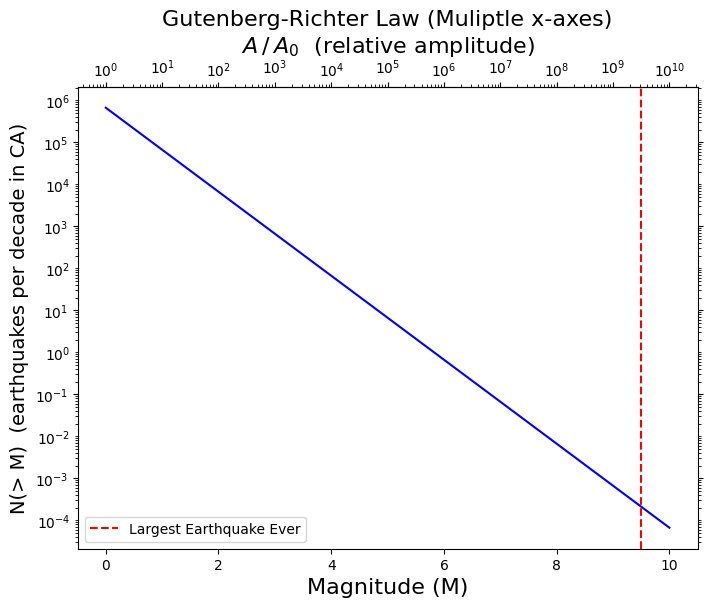

In [45]:
# Create a new figure and a set of axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot on the primary x-axis (M)
ax.plot(M, N, color='blue')
ax.axvline(9.5, color='red', linestyle='--', label='Largest Earthquake Ever')

# Set the scale to make this a log plot for the y-axes. Note the x-axis remains linear, 
# which is the deafault for matplotlib
ax.set_yscale('log')

# Set labels and title for the primary x-axis (M)
ax.set_xlabel('Magnitude (M)', fontsize=16)
ax.set_ylabel('N(> M)  (earthquakes per decade in CA)', fontsize=14)
ax.set_title('Gutenberg-Richter Law (Muliptle x-axes)', fontsize=16)

# Add tick marks on the upper x-axis and the rightmost y-axis for both axes
ax.tick_params(which='both', top=True, right=True)

# Show the legend
ax.legend()

# Tell matplotlib to show a major tick mark for each order of magnitude on both axes
ax.yaxis.set_major_locator(ticker.LogLocator(base=10))

# Set minor ticks in logarithmic scale for both axes
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1.0, 10.0), numticks=15))

# Create a secondary x-axis with lambda functions for the forward and inverse transformations
secax = ax.secondary_xaxis('top', functions=(lambda x: np.power(10, x), lambda x: np.log10(x)))
# The first  function in the tuple is the forward transformation primary axis   --> secondary axis
# The second function in the tuple is the inverse transformation secondary axis --> primary axis
# The lambda functions are a pythonic way to define simple functions in a single line
secax.set_xlabel(r'$A\slash A_0$' + '  (relative amplitude)', fontsize=16)
# Set the scale to make this a logarithmic secondary x-axis to display A/A_0
secax.set_xscale('log')
# Tell matplotlib to show a major tick mark for each order of magnitude on the secondary x-axis
secax.xaxis.set_major_locator(ticker.LogLocator(base=10))

# Set minor ticks in logarithmic scale for the secondary x-axis
secax.xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1.0, 10.0), numticks=15))

# Add tick marks on the upper x-axis and the rightmost y-axis for the secondary x-axis
secax.tick_params(which='both', top=True, right=True)
